# Download medium range forecast product in png or pdf format
In this exmaple we will download an image of a forecast product for a specific valid and base date at a specific geographic area.  
For this we will need to use libraries: 
- [requests](https://docs.python-requests.org/en/master/) 
- [json](https://docs.python.org/3/library/json.html)
- [datetime](https://docs.python.org/3/library/datetime.html) and
- [IPython](https://ipython.readthedocs.io)

In [1]:
import requests
import json
import datetime
from IPython import display

## Build link to download
First thing is to build the link to download from. The base of the link is the same for all the products:

In [2]:
api_url = "https://charts.ecmwf.int/opencharts-api/v1/"

The minimum parameter we need to pass is the product. 

To find the name of the product we want to download, click on Download link on the [Open Charts product](https://charts.ecmwf.int/products/medium-uv-rh) and then 'More documentation can be found here' will pop up.  
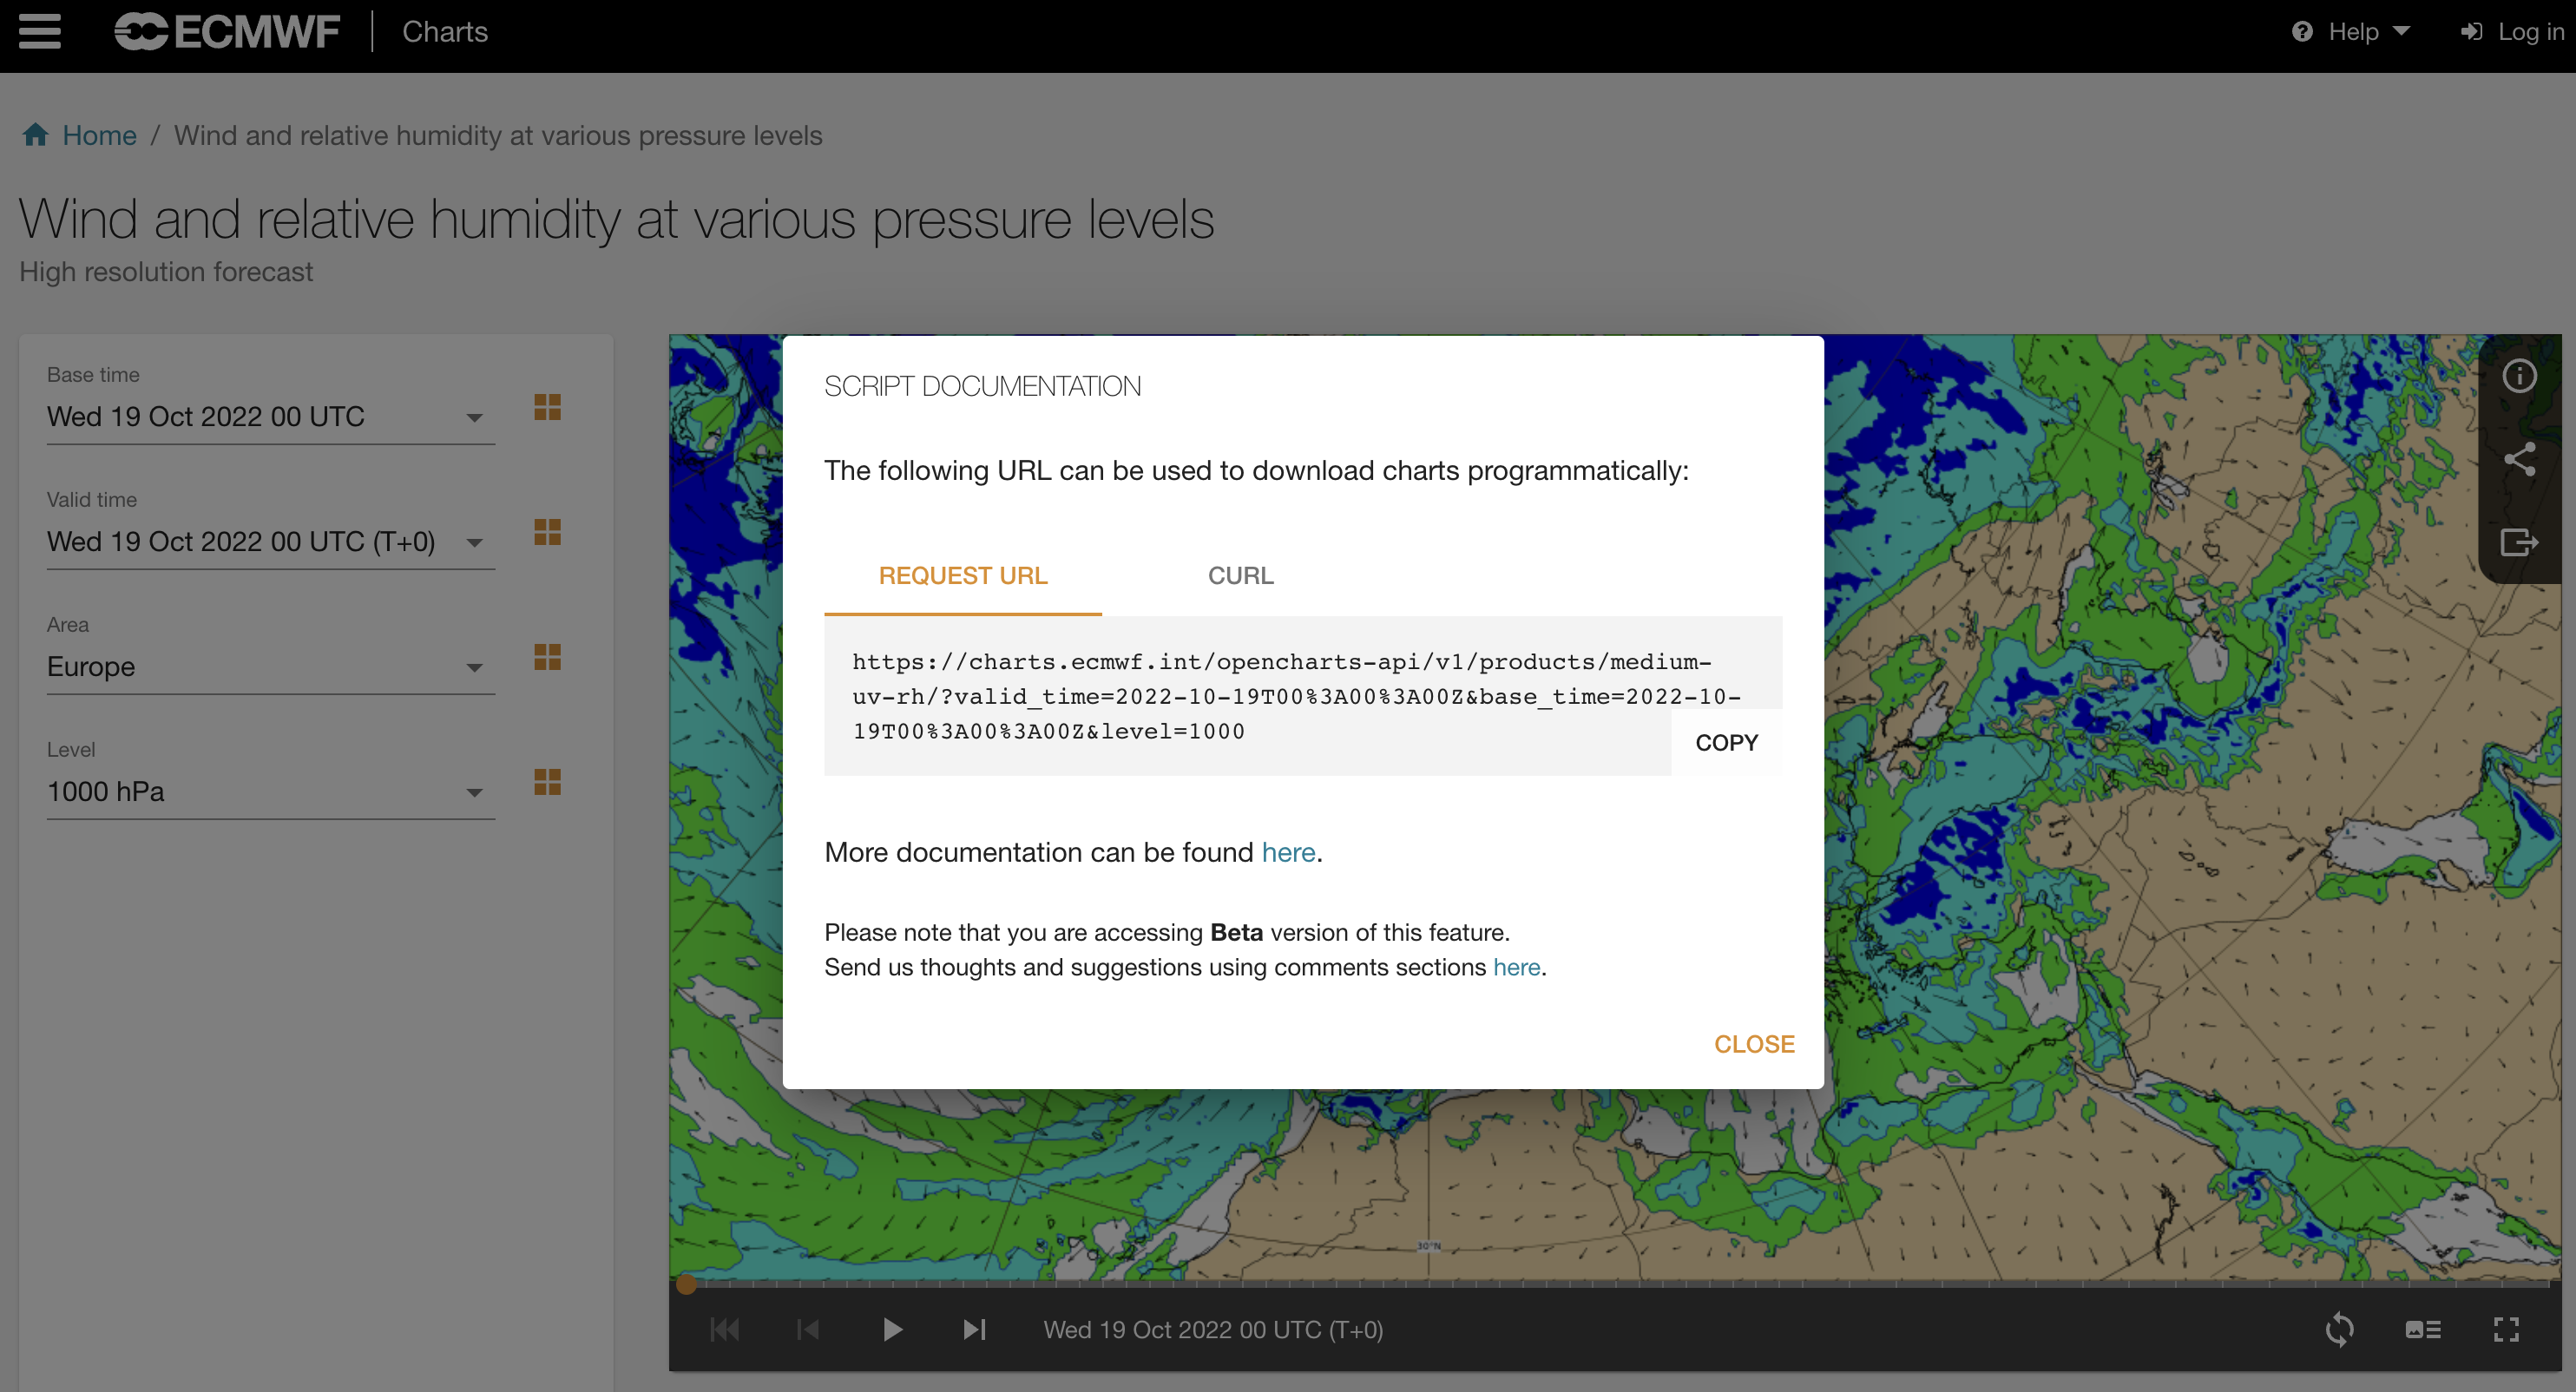

Click on the link to open the Swagger UI documentation. For our example product it will open [this page](https://charts.ecmwf.int/opencharts-api/v1/swagger-ui/?product=medium-uv-rh&package=opencharts).  

It will contain the name of the product and all its parameters.  
When you click on GET button, it will look something like this:  
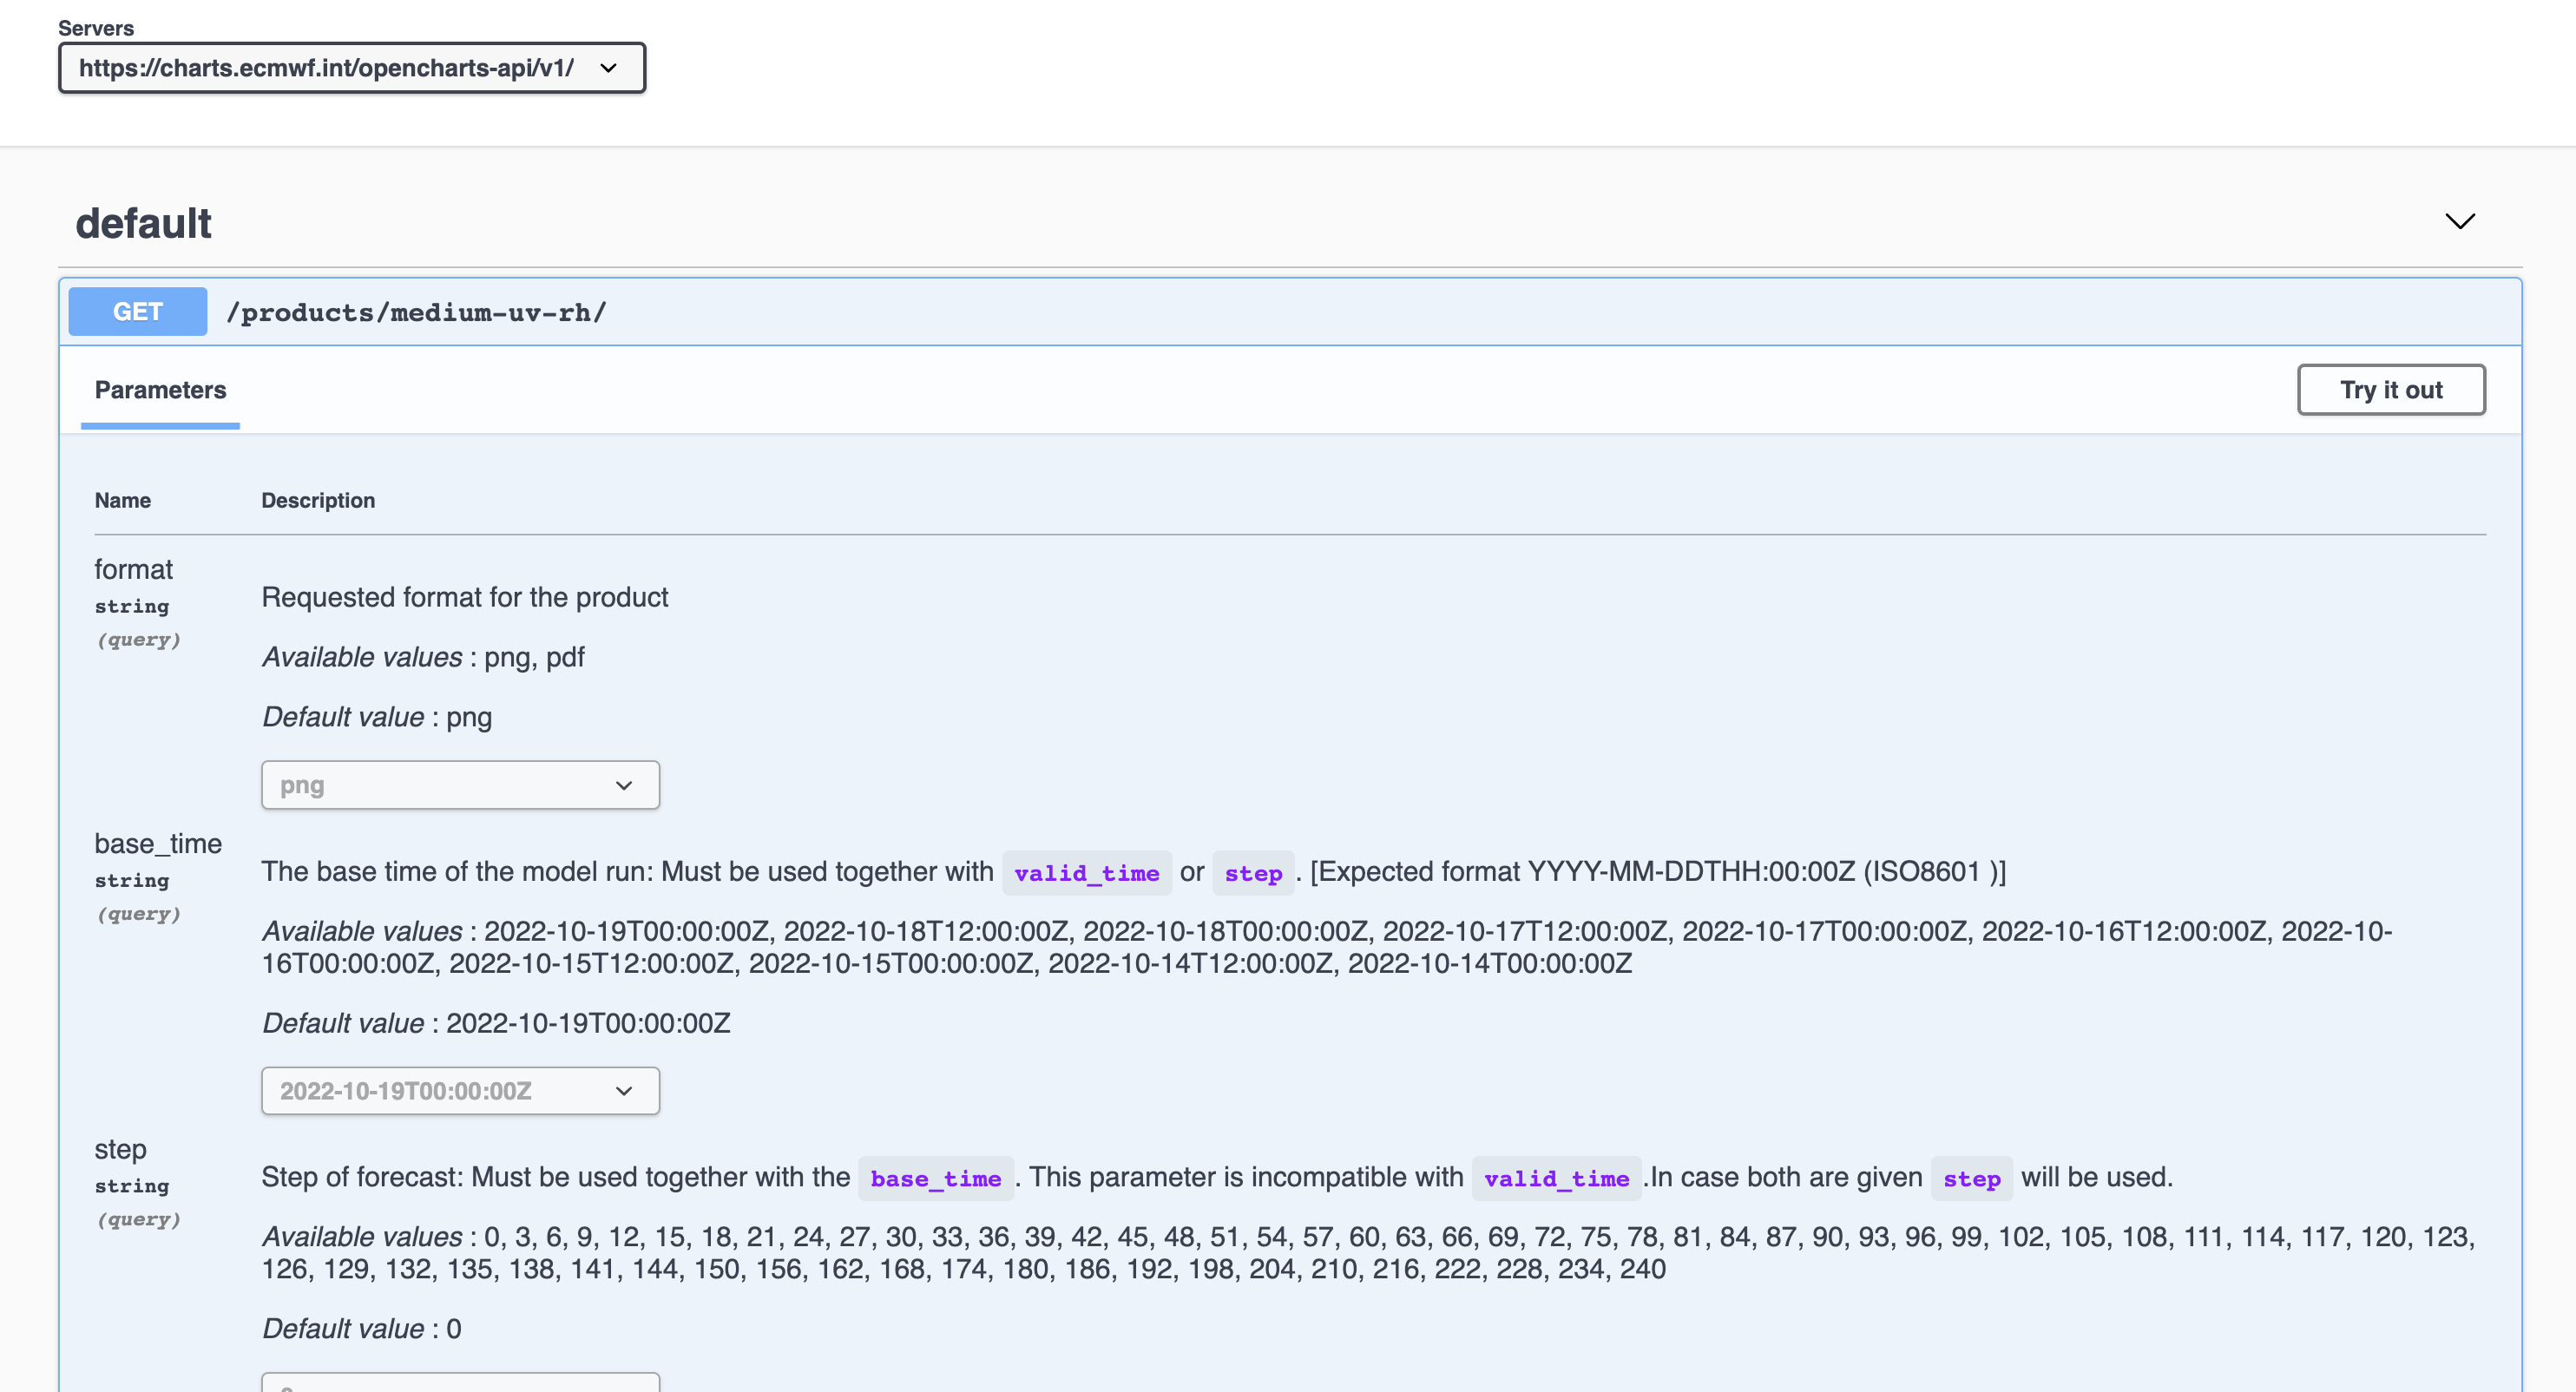

In [3]:
product = 'medium-uv-rh'

If we just put that, we will get the latest available forecast at default step (usually 0) at the default area. Not so exciting.  
In the documentation we can see that this product has following parameters: **format**, **base_date**, **valid_date/step**, **projection** and **level** (as we can have this product on different pressure levels).  

Let's set them.

In [4]:
today = datetime.date.today()
base_time = today.strftime('%Y-%m-%dT%H:%M:%SZ')
base_time

'2022-10-19T00:00:00Z'

In [5]:
tomorrow = today + datetime.timedelta(days = 1)
valid_time = tomorrow.strftime('%Y-%m-%dT%H:%M:%SZ')
valid_time

'2022-10-20T00:00:00Z'

In [6]:
projection = 'opencharts_central_europe'

In [7]:
level = '925'

Next we create the full link 

In [8]:
get = '{}products/{}/?valid_time={}&base_time={}&projection={}&level={}'.format(api_url, product, valid_time, base_time, projection, level)
print(get)

https://charts.ecmwf.int/opencharts-api/v1/products/medium-uv-rh/?valid_time=2022-10-20T00:00:00Z&base_time=2022-10-19T00:00:00Z&projection=opencharts_central_europe&level=925


And download the content and convert to dictionary

In [9]:
result = requests.get(get)
data = result.json()
print ( json.dumps(data, indent=2 ))

{
  "meta": {
    "terms-and-conditions": {
      "href": "https://apps.ecmwf.int/datasets/licences/general/"
    },
    "license": "CC-BY-4.0",
    "copyright": "2021 European Centre for Medium-Range Weather Forecasts"
  },
  "data": {
    "link": {
      "href": "https://charts.ecmwf.int/content/20221019091514-98daa27cec9baf6f4c97ae67315be334d15463c7.png",
      "type": "image/png"
    },
    "attributes": {
      "description": "Base time: Wed 19 Oct 2022 00 UTC Valid time: Thu 20 Oct 2022 00 UTC (+24h) Area : Central Europe Level : 925",
      "name": "medium-uv-rh",
      "title": "Wind and relative humidity at various pressure levels"
    },
    "type": "graphical_product"
  },
  "tracker": "tracker-c8c395ff37b8479eb1dc722372235413",
  "uid": ""
}


From this, we can see that actual link to the image is contained under keys **"data"**, **"link"** and **"href"**.

In [10]:
image_api = data["data"]["link"]["href"]
image_api

'https://charts.ecmwf.int/content/20221019091514-98daa27cec9baf6f4c97ae67315be334d15463c7.png'

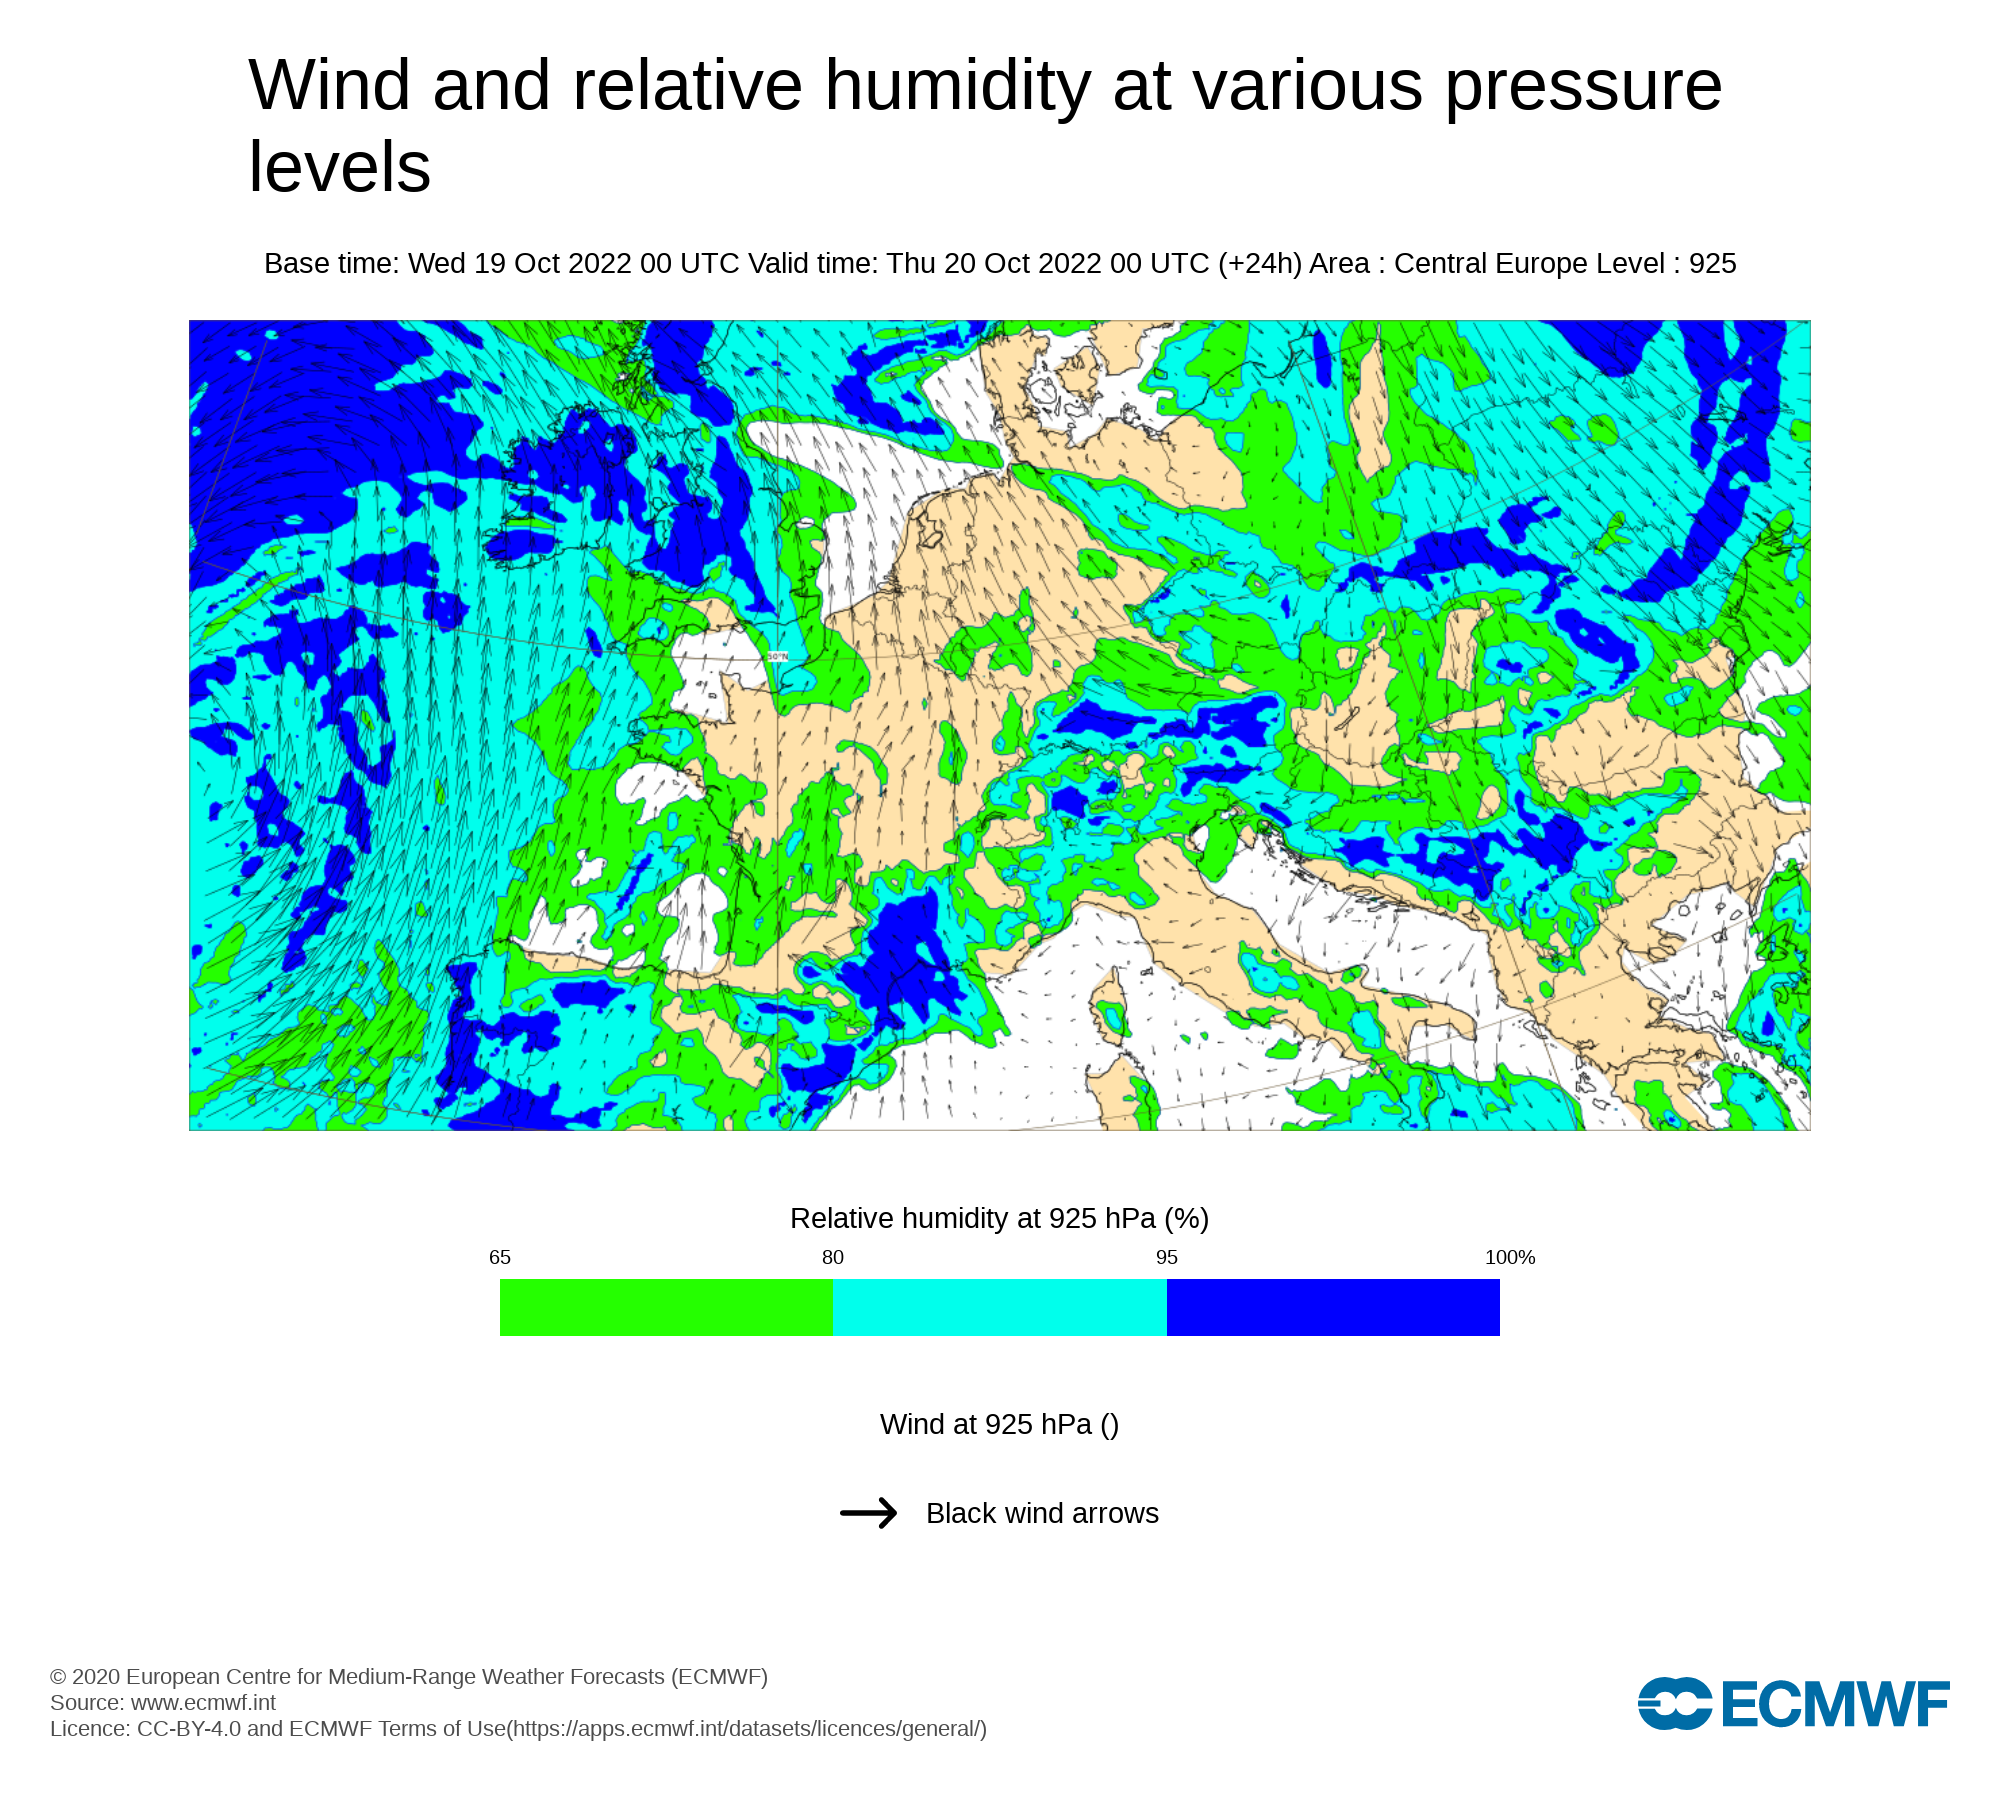

In [11]:
display.Image(image_api)

## Saving the image

In [12]:
image = requests.get(image_api)
file = "./{}.png".format(product)
with open(file, "wb") as img:
    img.write(image.content)

    
print ( "image saved in {}".format(file) )

image saved in ./medium-uv-rh.png


## Saving in pdf format
PNG format is default, which is why we didn't have it in our first version of the link.  
To get the pdf format, all we need to do is to add format parameter and set it to pdf.

In [13]:
image_format = 'pdf'
get = '{}products/{}/?valid_time={}&base_time={}&projection={}&level={}&format={}'.format(api_url, 
                                                                                          product, 
                                                                                          valid_time, 
                                                                                          base_time, 
                                                                                          projection, 
                                                                                          level, 
                                                                                          image_format)
result = requests.get(get)
data = result.json()
image_api = data["data"]["link"]["href"]
image = requests.get(image_api)
file = "./{}.pdf".format(product)
with open(file, "wb") as img:
    img.write(image.content)

    
print ( "image saved in {}".format(file) )

image saved in ./medium-uv-rh.pdf
